“超级引擎”是一家专门生产汽车引擎的公司，根据政府发布的新排放要求，引擎排放平均值要低于20ppm，
（ppm是英文百万分之一的缩写，这里我们只要理解为是按照环保要求汽车尾气中碳氢化合物要低于20ppm）。

公司制造出10台引擎供测试使用，每一台的排放水平如下：

15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9

怎么知道，公司生产的引擎是否符合政府规定呢？

如果你是这家公司的数据分析师，该怎么办呢？

# 一、描述统计分析

我们开展调查研究并计算统计结果时，我们会在报告的第一部分进行描述统计分析，例如平均值和标准差。描述统计量是研究的核心。告诉我们研究中发生的情况，应该始终报告出来。

In [1]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#样本数据集
dataSer=pd.Series([15.6,16.2,22.5,20.5,16.4,
                   19.4,16.6,17.9,12.7,13.9])

In [17]:
#样本平均值
sample_mean=dataSer.mean()
'''
这里要区别：数据集的标准差，和样本标准差
数据集的标准差公式除以的是n，样本标准差公式除以的是n-1。
样本标准差，用途是用样本标准差估计出总体标准差
pandas计算的标准差，默认除以的是n-1，也就是计算出的是样本标准差
pandas标准差官网地址：https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html
'''
#样本标准差
sample_std=dataSer.std()
print('样本平均值=',sample_mean,'单位：ppm')
print('样本标准差=',sample_std,'单位：ppm')

样本平均值= 17.169999999999998 单位：ppm
样本标准差= 2.9814426038413018 单位：ppm


# 二、推论统计分析

推论统计分析报告中包括：假设检验，置信区间，效应量

## 1. 问题是什么？

### 零假设和备选假设

要研究的问题是：这些样本数据是否满足新标准呢？

根据这个问题我提出来下面两个互为相反的假设。

零假设H0：公司引擎排放不满足标准，也就是平均值u>=20。这里的20是政府规定新标准的最低可能值。

零假设总是表述为研究没有改变，没有效果，不起作用等，这里就是不满足标准。

备选假设H1：公司引擎排放满足标准，也就是平均值u<20

### 检验类型

检验类型有很多种，因为这里只有1个样本，所以选择单样本检验。

检验类型参考资料：http://support.minitab.com/zh-cn/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/

### 抽样分布类型

我们还要判断抽样分布是哪种？因为抽样分布的类型，决定了后面计算p值的不同。

在我们这个汽车引擎案例中，样本大小是10（小于30），属于小样本。那小样本的抽样分布是否满足t分布呢？因为t分布还要求数据集近似正态分布，所以下面图片我们看下样本数据集的分布长什么样。

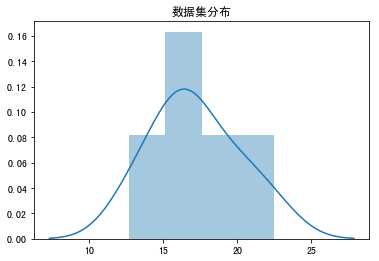

In [20]:
'''
直方图能够粗略估计数据密度，如果想给数据一个更精确的拟合曲线（专业术语叫：核密度估计kernel density estimate (KDE)），
Seaborn 可以很方便的画出直方图和拟合曲线。
查看数据集分布官网教程地址：https://seaborn.pydata.org/tutorial/distributions.html
'''
'''
需要在conda中先安装绘图包seaborn：
conda install seaborn
'''
import seaborn as sns

#查看数据集分布
sns.distplot(dataSer)
plt.title('数据集分布')
plt.show()

通过观察上面数据集分布图，数据集近似正态分布，满足t分布的使用条件，所以抽样分布是t分布，自由度df=n-1=10-1=9。

### 检验方向

单尾检验（左尾，右尾），还是双尾检验？

因为备选假设是公司引擎排放满足标准，也就是平均值u<20

所以我们使用单尾检验中的左尾检验

### 总结

综合以上分析，本次假设检验是单样本t检验，单尾检验中的左尾。

# 2.证据是什么？

在零假设成立前提下，得到样本平均值的概率p是多少？

计算p值步骤也很简单：

1）计算出标准误差

标准误差=样本标准差除以样本大小n的开方。这里的样本标准差是用来估计总体标准差的

2）计算t值

t=（样本平均值-总体平均值）/标准误差

3）根据t值，查找t表格，得到概率p值

In [23]:
'''
方法一：手动计算，熟悉过程
1）计算标准误差
标准误差=样本标准差/(n的开方)
'''
#样本大小
n = 10
#标准误差=样本标准差/(n的开方)
se = sample_std / np.sqrt(n)

'''
2）计算t值
t=（样本平均值-总体平均值）/标准误差
'''
#总体平均值：就是政府发布的标准20
pop_mean=20
#t值
t = (sample_mean - pop_mean) / se
#计算出t值=-3

print('标准误差se=',se)
print('t=',t)

'''
#2)然后查t表，自由度df=n-1,看该t值对应的概率：p=0.0149
计算该值的工具：https://www.graphpad.com/quickcalcs/
'''
pass

标准误差se= 0.9428149341201592
t= -3.001649525885985


In [24]:
'''
方法二：用python统计包scipy自动计算
用scipy计算出的是：双尾检验
单（1samp）样本t检验（ttest_1samp）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
相关（related）样本t检验（ttest_rel）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
双独立（independent）样本t检验（ttest_ind）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
'''
#导入统计模块（stats）
from scipy import stats

#总体平均值
pop_mean=20

'''
ttest_1samp：单独样本t检验
返回的第1个值t是假设检验计算出的（t值），
第2个值p是双尾检验的p值
'''
t,p_twoTail = stats.ttest_1samp(dataSer, pop_mean)

print('t值=',t,'双尾检验的p值=',p_twoTail) 

t值= -3.001649525885985 双尾检验的p值= 0.014916414248897527


In [25]:
'''
因为scipy计算出的是双尾检验的t值和p值，但是我们这里是左尾检验。
根据对称性，双尾的p值是对应单尾p值的2倍
'''
#单尾检验的p值
p_oneTail=p_twoTail/2

print('单尾检验的p值=',p_oneTail)

单尾检验的p值= 0.0074582071244487635


## 3. 判断标准是什么？

In [26]:
#判断标准（显著水平）使用alpha=5%
alpha=0.05

## 4. 做出结论

In [20]:
'''
左尾判断条件：t < 0 and  p < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p < 判断标准（显著水平）alpha
'''
#做出结论
if(t<0 and p_oneTail< alpha): 
    #左尾判断条件
    print('拒绝零假设，有统计显著，也就是汽车引擎排放满足标准')
else: 
    print('接受零假设，没有统计显著，也就是汽车引擎排放不满足标准')

拒绝零假设，有统计显著，也就是汽车引擎排放满足标准


对很多科学来说，我们使用APA格式来报告假设检验的结果。APA表示的美国心理学会，APA格式是美国心理学会给出了如何撰写研究论文的完整指南，其中一部分告诉我们如何写出推论统计学结果。

图中给出了写出t检验结果的一般规则:t(df)=x.xx,p=.xx,检验方向

我们按图中标出的序号，看下在报告假设检验时，需要告诉读者以下几点信息：
1）检验类型
包括检验类型，抽样分布，检验方向
首先执行的是哪种类型的检验？在此示例中是单样本t检验，接着在括号中写出自由度，写上等号，然后给出t值，保留两位小数。写上逗号，然后给出p值，同样保留两位小数，然后输出逗号，并指明检验方向。是单尾检验还是双尾检验。
2）精确的p值
然后给出p值，同样保留两位小数，然后输出逗号，
3）给出检验方向，例如是单尾检验还是双尾检验。
4）显著性水平
始终让读者知道你在做出决策时使用的显著性水平。

独立样本t(9)=-3.00 , p=.0074 (α=5%),单尾检验（左尾）

## 5.置信区间

图片里是APA格式的置信区间：平均值的置信区间，95% CI=(a,b)

在报告告置信区间时，提供了这样几个信息：
1）开头会说是哪种类型的置信区间
例如在单样本检验中是单个平均值的置信区间，但是在我们后面要讲到的相关样本检验是两个平均值之间差异的置信区间。
在这个案例里，我们是单个平均值的置信区间
2）置信水平和区间的上下限。
置信水平（简写为CI），括号里写上下限。这里是95的置信水平

In [28]:
'''
1）置信水平对应的t值（t_ci）
查t表格可以得到，95%的置信水平，自由度是n-1对应的t值
2）计算上下限
置信区间上限a=样本平均值 - t_ci ×标准误差
置信区间下限b=样本平均值 + t_ci ×标准误差
'''

'''
查找t表格获取
95%的置信水平，自由度是n-1对应的t值
注意：课程中这里对应的下面t_ci值有误，以下面的值为准
'''
t_ci=2.262
#使用scipy计算标准误差
se=stats.sem(dataSer)
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se


#标准误差:https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

In [29]:
print('单个平均值的置信区间，95置信水平 CI=(%f,%f)' % (a,b))

单个平均值的置信区间，95置信水平 CI=(15.037353,19.302647)


### 6.效应量

还需要在报告中给出效应量（effect size）。什么是效应量呢？

效应量是指处理效应的大小，例如药物A比药物B效果显著。度量效应量有很多种，但大多数都属于两大主要类别。

1）第一种叫做差异度量

例如在对比平均值时，衡量效应大小的常见标准之一是Cohen's d

Cohen's d = （样本平均值1-样本平均值2) / 标准差  

Cohen's d 除以的是标准差，也就是以标准差为单位，样本平均值和总体平均值之间相差多少。

2）第二种叫做相关度度量

例如R平方，表示某个变量的变化比例与另一变量的关系。可以用t检验的信息推出R平方的公式，这里的t值从t检验中获得的值，df是自由度。

r2=t2 / (t2+df),其中r2是指r的平方，t2是t的平方

如果r平方等于20%，表示我们可以说通过知道另一个变量能够接受相关变量20%的变化情况

为什么要给出效应量？

在判断某个调查研究的结果，是否有意义或者重要时，要考虑的另一项指标是效应量。效应量太小，意味着处理即使达到了显著水平，也缺乏实用价值。

所以，在假设检验中，我们给出了是否具有统计显著性，也要给出效应量，一起来判断研究结果是否有意义。

效应量报告格式：d=x.xx ，R2=.xx

In [30]:
'''
效应量：差异指标Cohen's d
'''
d=(sample_mean - pop_mean) / sample_std
'''
效应量：相关度指标R2
'''
#样本大小
n=10
#自由度
df=n-1
R2=(t*t)/(t*t+df)

print('d=',d)
print('R2=',R2)

d= -0.9492049239364257
R2= 0.5002748453994631


# 三、数据分析报告

1、描述统计分析

样本平均值17.17ppm，样本标准差2.98ppm

2、推论统计分析

1）假设检验

独立样本t(9)=-3.00,p=.0074(α=5%)，单尾检验（左尾）

公司引擎排放满足标准

2）置信区间

平均值的置信区间，95% CI=(17.11,17.23)

3）效应量

d=-0.94
